CNN With Handwritten Mnist Dataset

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

Load in the dataset and split into train and test

In [2]:
# Load the MNIST dataset and split it into training and testing sets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

Show What the dataset values look like

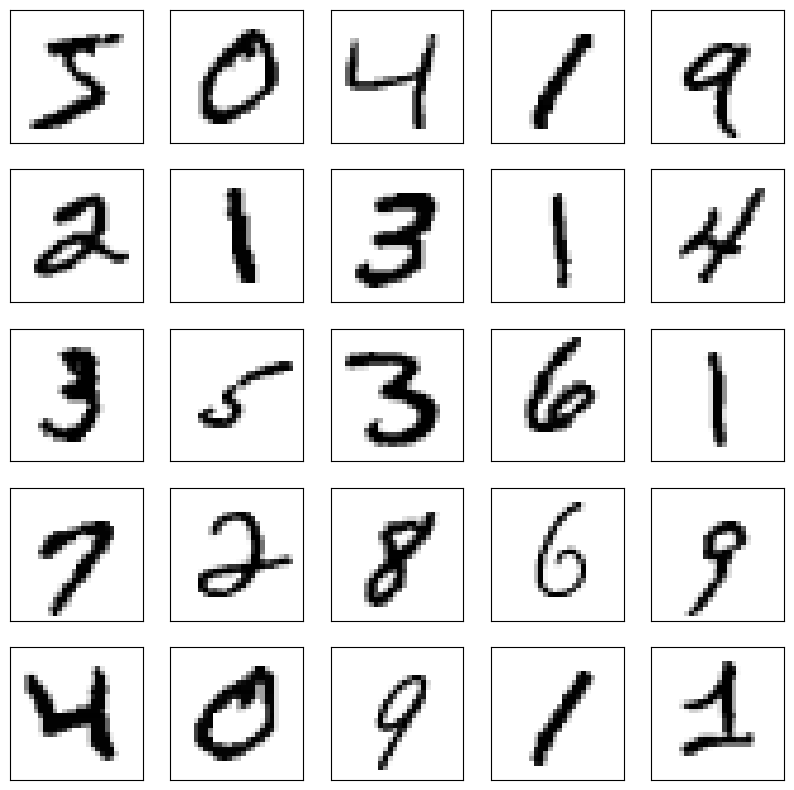

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

Create the first CNN Model to represent the AdaGrad model

In [4]:
# Create a Sequential model with layers (Convulutional layer, pooling, flatten, 2 hidden layers, output layer)
model = tf.keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Compile and Fit the AdaGrad version of the CNN

In [5]:
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history_adagrad = model.fit(train_images, train_labels, epochs=10,
                            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0934 - accuracy: 0.7418 - val_loss: 0.4472 - val_accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3921 - accuracy: 0.8925 - val_loss: 0.3272 - val_accuracy: 0.9107
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3220 - accuracy: 0.9082 - val_loss: 0.2867 - val_accuracy: 0.9194
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2898 - accuracy: 0.9174 - val_loss: 0.2623 - val_accuracy: 0.9251
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2678 - accuracy: 0.9227 - val_loss: 0.2447 - val_accuracy: 0.9304
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2511 - accuracy: 0.9270 - val_loss: 0.2303 - val_accuracy: 0.9333
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2367 - accuracy: 0.9310 - val_loss: 0.2197 - val_acc

Define, compile, and fit the Stochastic Gradient Descent version of the model

In [7]:
# Define a new model for SGD by cloning the original model
model_sgd = tf.keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the new model with the SGD optimizer
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_sgd = model_sgd.fit(train_images, train_labels, epochs=10,
                            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4986 - accuracy: 0.8655 - val_loss: 0.2403 - val_accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2047 - accuracy: 0.9384 - val_loss: 0.1536 - val_accuracy: 0.9545
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1510 - accuracy: 0.9544 - val_loss: 0.1255 - val_accuracy: 0.9605
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1202 - accuracy: 0.9636 - val_loss: 0.1092 - val_accuracy: 0.9670
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1001 - accuracy: 0.9696 - val_loss: 0.0970 - val_accuracy: 0.9705
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0858 - accuracy: 0.9735 - val_loss: 0.0853 - val_accuracy: 0.9727
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0755 - accuracy: 0.9772 - val_loss: 0.0756 - val_accuracy:

Plot the 2 models Accuracy and Loss during the Training phase

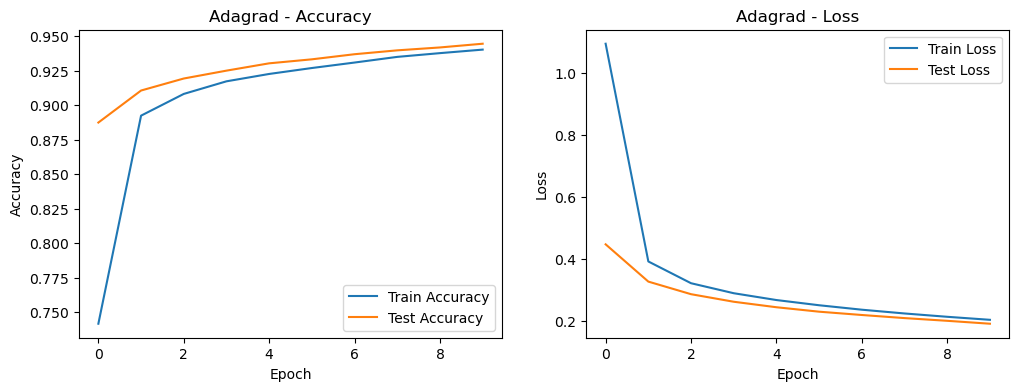

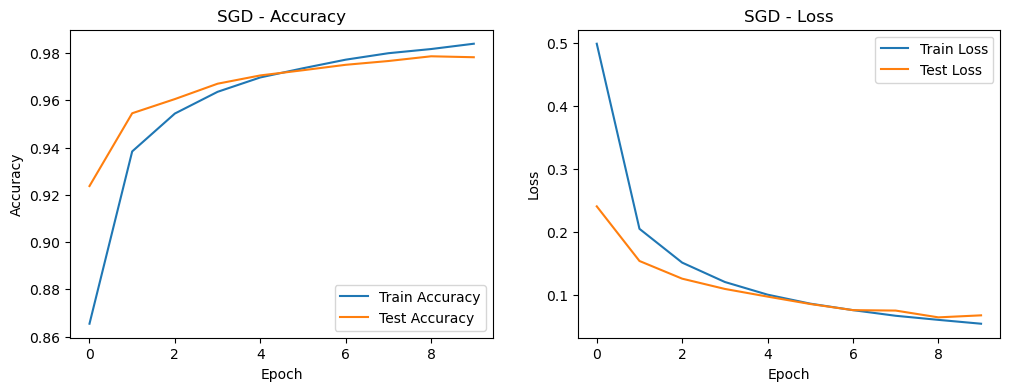

In [8]:
# Function to plot training history

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title + ' - Accuracy')
    plt.legend()

    # Create another subplot (for loss)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title + ' - Loss')
    plt.legend()

    plt.show()

# Plot training history for Adagrad
plot_history(history_adagrad, title='Adagrad')

# Plot training history for SGD
plot_history(history_sgd, title='SGD')

Evaluate the models and show the final accuracy on the test set for each

In [9]:
# Evaluate the Adagrad model on the test data and retrieve the test loss and accuracy
test_loss_ada, test_acc_ada = model.evaluate(x=test_images, y=test_labels)

# Evaluate the SGD model on the test data and retrieve the test loss and accuracy
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9782


In [10]:
# Print the final test accuracy for the Adagrad model with 4 decimal places
print("Final Test Accuracy (Adagrad): {:.4f}".format(test_acc_ada))

Final Test Accuracy (Adagrad): 0.9446


In [11]:
# Print the final test accuracy for the SGD model with 4 decimal places
print("Final Test Accuracy (SGD): {:.4f}".format(test_acc_sgd))

Final Test Accuracy (SGD): 0.9782


Visualize the Predictions on the actual images with the actual labels

1/1 [==============================] - 0s 53ms/step


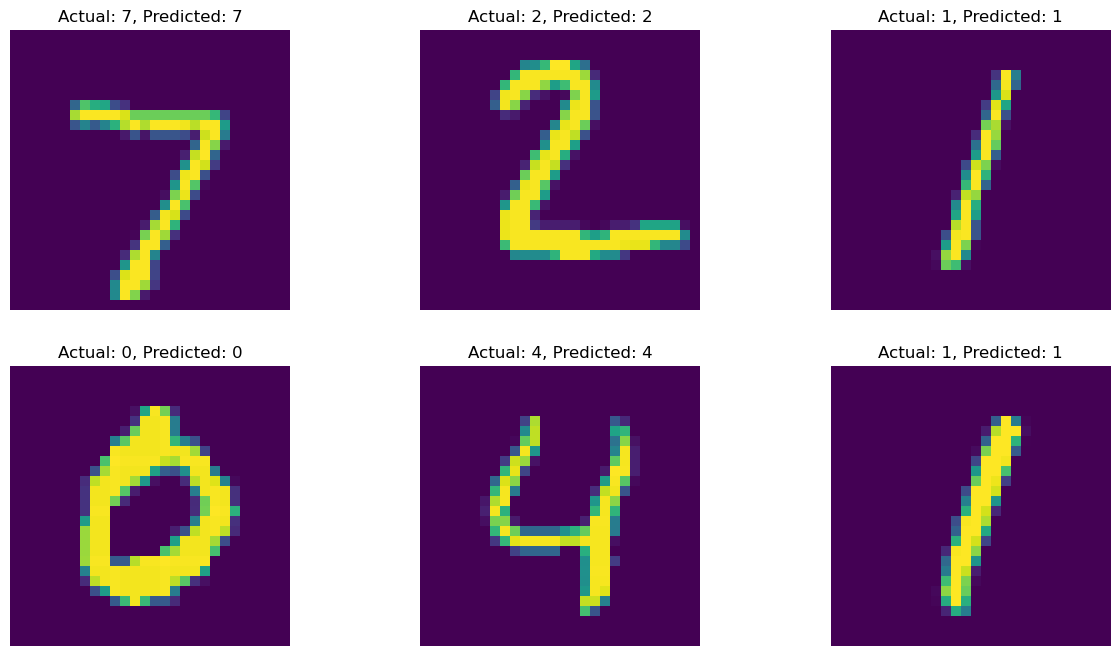

In [12]:
predictions = model_sgd.predict([test_images[:6]])
plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')

    predicted_label = np.argmax(predictions[i])
    actual_label = test_labels[i]
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')

plt.show()